## El primer paso del proyecto es importar el/los datasets que nos ayudaran a la elaboracion del proyecto

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./oro?/triplets_file.csv")
df_songs = pd.read_csv("./oro?/song_data.csv")

In [3]:
df.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [4]:
df_songs.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


## Ahora indagemos los datos del dataframe priincipal (df) para darnos una idea con lo que estaremos trabajando

In [5]:
df.user_id.nunique()

76353

In [6]:
respuestas_promedio = df.shape[0] / df.user_id.nunique()
respuestas_promedio

26.194124657839247

#### Vemos que en el dataframe tenemos 76353 usuarios que han respondido, los cuales escuchan en promedio 26 canciones diferentes aproximadamente

In [7]:
df.sort_values(by="listen_count").head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1151076,2717cf7fe16bdb5a7e5c978349395b825dc4c223,SOJJYOM12A8C142CD9,1
1151075,2717cf7fe16bdb5a7e5c978349395b825dc4c223,SOJGZFQ12AF72A41B2,1
1151074,2717cf7fe16bdb5a7e5c978349395b825dc4c223,SOJGSFH12AB017EFC2,1
1151072,2717cf7fe16bdb5a7e5c978349395b825dc4c223,SOIPFGR12B0B8063CB,1


In [8]:
df.sort_values(by="listen_count").tail()

,user_id,song_id,listen_count
1875121,c012ec364329bb08cbe3e62fe76db31f8c5d8ec3,SOBONKR12A58A7A7E0,683
31179,bb85bb79612e5373ac714fcd4469cabeb5ed94e1,SOZQSVB12A8C13C271,796
1586780,5ea608df0357ec4fda191cb9316fe8e6e65e3777,SOKOSPK12A8C13C088,879
1048310,50996bbabb6f7857bf0c8019435b5246a0e45cfd,SOUAGPQ12A8AE47B3A,920
1228366,d13609d62db6df876d3cc388225478618bb7b912,SOFCGSE12AF72A674F,2213


#### Vemos que hay usuarios que han oido una cancion desde 1 vez hasta usuarios que han escuchado una cancion mas de 2000 veces

In [9]:
df.isnull().sum()

user_id         0
song_id         0
listen_count    0
dtype: int64

#### Parecen muy limpios los datos

In [10]:
c = df['listen_count'].value_counts()
c.head()

listen_count
1    1138433
2     313043
3     142933
5      93136
4      82569
Name: count, dtype: int64

In [11]:
df['listen_count'].nunique()

295

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

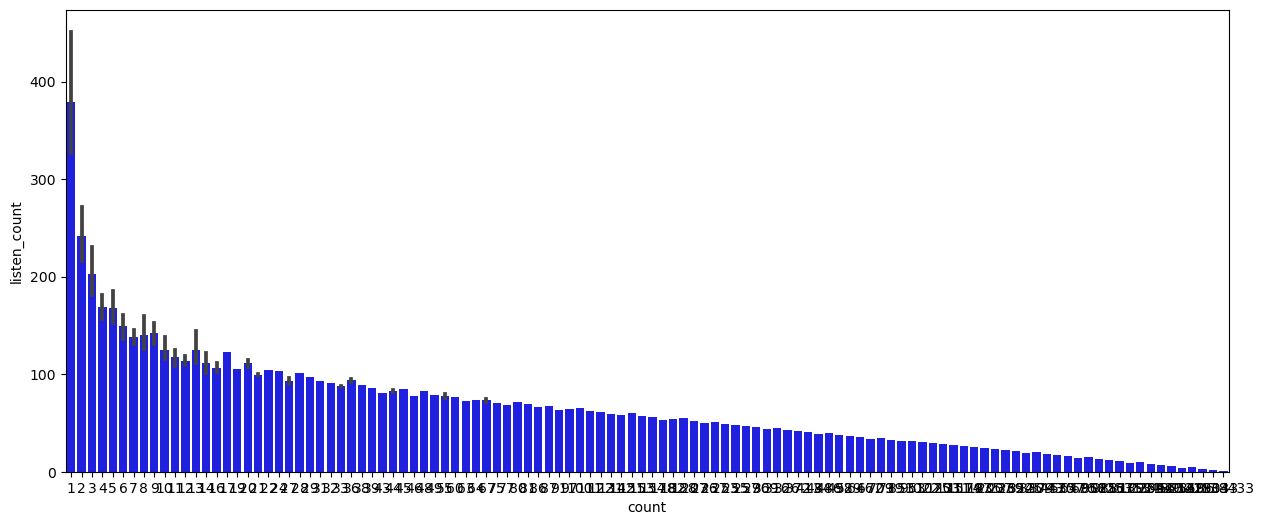

In [13]:
plt.figure(figsize=(15, 6))
sns.barplot(x=c,y=c.index, color='blue')
plt.show()

#### Aqui tenemos un problema, pues tenemos una gran cantidad de diferentes escuchadas, casi 300, por lo que para hacerlo mas general y hacer recomendaciones mas generales, haremos rangos de estas escuchadas por cancion.

In [14]:
c.sum()

2000000

In [15]:
bins = [0, 3, 10, 20, 30, 40, 50, 100, 200, 500, float('inf')]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df['calificacion'] = pd.cut(df['listen_count'], bins=bins, labels=labels, right=False)

df.head()

,user_id,song_id,listen_count,calificacion
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,1


In [16]:
#rectificamos que la nueva columan sea de numeros

df['calificacion'] = df['calificacion'].astype(int)

type(df['calificacion'][0])

numpy.int64

In [17]:
d = df['calificacion'].value_counts()
d.head()

calificacion
1    1451476
2     434487
3      79587
4      19044
5       7105
Name: count, dtype: int64

In [18]:
df['calificacion'].nunique()

10

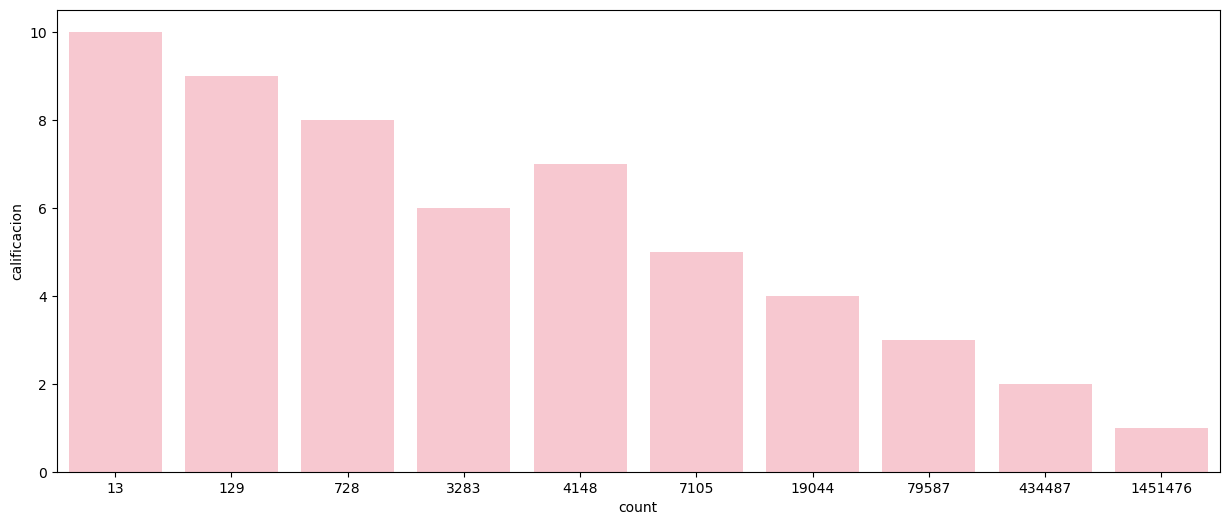

In [19]:
plt.figure(figsize=(15, 6))
sns.barplot(x=d,y=d.index, color='pink')
plt.show()

#### Por ultimo eliminamos la columna 'listen_count' pues ya no nos importa

In [20]:
df = df.drop('listen_count', axis=1)
df.head()

,user_id,song_id,calificacion
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


### Ahora toca dividir nuestros datos, para poder entrenar, testear y validar nuestro modelo

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df_train, df_val = train_test_split(df, test_size = 0.2, random_state=1)
print(df_train.shape, df_val.shape)

(1600000, 3) (400000, 3)


In [23]:
df_train.head()

,user_id,song_id,calificacion
1952144,2ce5b56b6c651accc947db94e5f5b37b51a8b4dc,SOXHIDK12A58A7CFB3,1
767002,a540373b4f88f7a34203ce1c8bbfa0bb56679aaf,SOITJIQ12A8C13A291,1
797412,c6c9c2f0cb0174cc67f4bd803431e709438ba360,SOUSOKG12A58A7AC15,2
1235336,2c460774b978af80929ace6109bbf405c9c872bc,SOWUEQA12A8151BA81,1
1955142,2869bf0c721e75cc0871adb749916085e3ef23f0,SOSHJIH12AF72A1D72,1


In [24]:
df_train[["user_id","song_id","calificacion"]]

,user_id,song_id,calificacion
1952144,2ce5b56b6c651accc947db94e5f5b37b51a8b4dc,SOXHIDK12A58A7CFB3,1
767002,a540373b4f88f7a34203ce1c8bbfa0bb56679aaf,SOITJIQ12A8C13A291,1
797412,c6c9c2f0cb0174cc67f4bd803431e709438ba360,SOUSOKG12A58A7AC15,2
1235336,2c460774b978af80929ace6109bbf405c9c872bc,SOWUEQA12A8151BA81,1
1955142,2869bf0c721e75cc0871adb749916085e3ef23f0,SOSHJIH12AF72A1D72,1
...,...,...,...
491263,e6f1dd0b1cb86f83aa056289ef6b83c059064773,SOLQSWM12A6D4FA60D,1
1840200,fe75beb1e8dcba3145048acc92d3f5a94ac0ae5b,SOSJZID12A8C13E802,1
470924,c2ec3f7c38ae13c8819c978d0b33b3c406f11c24,SORKVID12A6D4FC6D2,1
491755,db7c0b803e0a137e8f32ff52c44571960fdc730c,SOOXLKF12A6D4F594A,1


#### Ya con esta matriz, es hora de descomponerla mediante SVD en otras 3, las cuales usaremos para nuestro sistema de recomendacion, una para los usuarios, una diagonal y otra para las canciones

In [25]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import cross_validate

reader = Reader(line_format='user item rating', rating_scale=(1, 10))

In [26]:
dataTrain = Dataset.load_from_df(df_train[["user_id","song_id","calificacion"]], reader=reader)
dataTrain = dataTrain.build_full_trainset()

dataTest = Dataset.load_from_df(df_val[["user_id","song_id","calificacion"]], reader=reader)
dataTest = dataTest.construct_testset(dataTest.raw_ratings)

In [27]:
algo = SVD()

algo.fit(dataTrain)

predictions = algo.test(dataTest)

accuracy.rmse(predictions)

RMSE: 0.6525


0.652504305617324

#### otra manera de ver como se comporta el algoritmo
cross_validate(algo, dataTrain, measures=['RMSE'], cv=5, verbose=True)

In [104]:
df_val.tail()

,user_id,song_id,calificacion
1210428,ab32eff76c81a39a09c1f10dd2155e7b3372a419,SOZBZFF12A6310F12D,3
1630603,71d8c52216539735e4683503e3fb3a87ee0c4c27,SOFKABN12A8AE476C6,1
1658663,e16d234123189f54fa7bb0d64ac03f9ebeaa6678,SOVTLQW12AB0186641,1
1522247,7c5501b833bf1fc624deb438ef421913f023e159,SOLTQZY12A8C13262F,1
207043,7c4661e0c26999d3a495d3d51aa38c5ce81c3440,SOMORYX12B0B80908A,2


#### Probemos una prediccion

In [96]:
user_id = "76bc893a4163b46d5474d501e1d11456546b50d2"
song_id = "SONUHDN12AB01800D7"

In [97]:
pred = algo.predict(user_id, song_id, r_ui=4, verbose=True)
x = [pred.iid, pred.est]
print(f"La calificacion estimada del usuario es {pred[3]}")

user: 76bc893a4163b46d5474d501e1d11456546b50d2 item: SONUHDN12AB01800D7 r_ui = 4.00   est = 1.49   {'was_impossible': False}
La calificacion estimada del usuario es 1.4885038234628214


### Ahora hagamos el sistema de recomendacion, en el que le damos un usuario y nos recomienda las 10 mejores canciones para el/ella/eso/helicopterodecombate/elle

In [98]:
canciones = df["song_id"].unique()
canciones.size

10000

In [99]:
def recomendador(user):
    idsRecomendadas = []
    for i in range(0,canciones.size):
        pred = algo.predict(user_id, canciones[i], r_ui=4, verbose=False)
        idsRecomendadas.append([pred.iid, pred.est])
    
    myvar = pd.DataFrame(idsRecomendadas, columns=['song_id', 'calif']).sort_values(by=['calif'], ascending=False)
    recomendadas = myvar.head(10)
    return recomendadas

In [100]:
def IdSongToName(datos):
    song_ids = datos['song_id']
    filtered_songs = df_songs[df_songs['song_id'].isin(song_ids)][['title', 'release', 'artist_name']]
    return filtered_songs

In [101]:
def musicRecommendationSystem(user):
    cancionesRecomendadas = recomendador(userPrueba)
    RecomendacionesFinales = IdSongToName(cancionesRecomendadas)
    return RecomendacionesFinales

In [106]:
userPrueba = 'c6c9c2f0cb0174cc67f4bd803431e709438ba360'


musicRecommendationSystem(userPrueba)

,title,release,artist_name
73281,Automotywacja,Autentyk 2,Vienio & Pele
120934,Gestern_Morgen,Happy In Grey,Damero feat. Nevis Peak
160823,One More Step To Take,Collection,Delegation
195333,In League With Satan,Works Of Carnage,Krisiun
201883,Ain't Misbehavin,Summertime,Sam Cooke
469596,Machine Kit,The Best Of Sixteen Volt,16Volt
484965,Bros Sto Rimagmeno Spiti (2003 Digital Remaster),50 Hronia Rebetiko Tragoudi,George Dalaras
556707,Death Ain't No Big Deal (Tribute To Jake Hess ...,Tribute To Jake Hess,Jake Hess
892984,Cold Blooded (Acid Cleanse),Machine Punk Music,The fFormula
894992,221,Spun,keller williams
